# 초기 설정 및 모듈 불러오기

In [4]:
import warnings 

warnings.filterwarnings(action='ignore')

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import calmap
import calplot
from vega_datasets import data as vds

plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

# COVID19 진행 상황

In [6]:
# raw 코로나 데이터 불러오기

covid_data=pd.read_csv('data/Covid_case.csv')

In [7]:
# 필요 칼럼만 추출
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401,2441.0,2021,9
2021-09-24,3269.0,295132,2434.0,2021,9
2021-09-23,2433.0,292699,2427.0,2021,9
2021-09-22,1716.0,290983,2419.0,2021,9
2021-09-21,1720.0,289263,2413.0,2021,9


<AxesSubplot:title={'center':'2020 Calendar Heatmap'}>

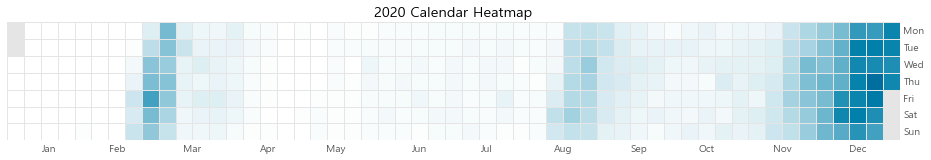

In [9]:
#코로나 확진자 수 히트맵(2020)

plt.figure(figsize=(16,8))
plt.title('2020 Calendar Heatmap')
calmap.yearplot(data=covid_data_new['daily_decideCnt'],year=2020,cmap='ocean_r')

<AxesSubplot:title={'center':'2021 Calendar Heatmap'}>

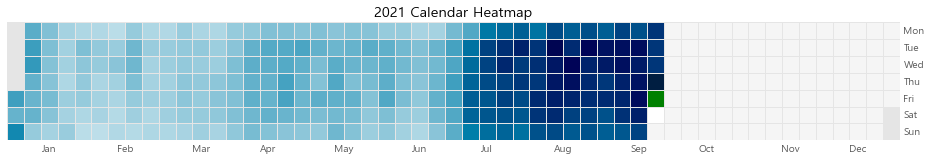

In [10]:
#코로나 확진자 수 히트맵(2021)

plt.figure(figsize=(16,8))
plt.title('2021 Calendar Heatmap')
calmap.yearplot(data=covid_data_new['daily_decideCnt'],year=2021, cmap='ocean_r')

In [7]:
# 일별 확진자수 분포 확인

covid_data_new.describe().daily_decideCnt

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

<AxesSubplot:title={'center':'The Cumulative Trend Of COVID-19 Confirmed cases'}, xlabel='stateDt', ylabel='decideCnt'>

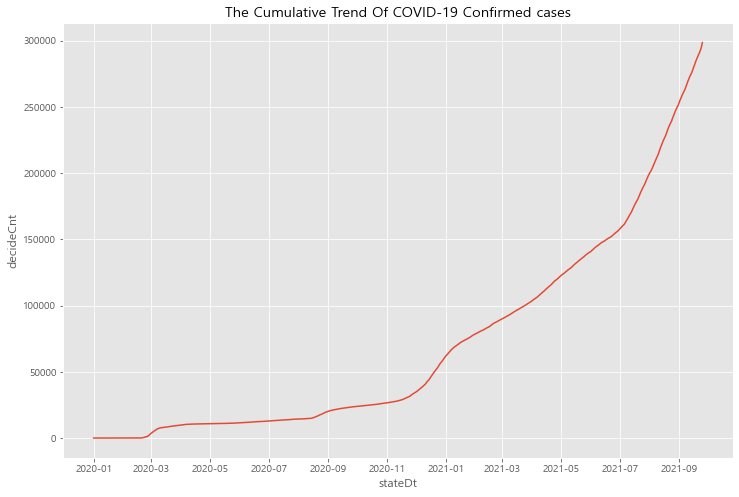

In [8]:
# 코로나 누적 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('The Cumulative Trend Of COVID-19 Confirmed cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='decideCnt')

<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

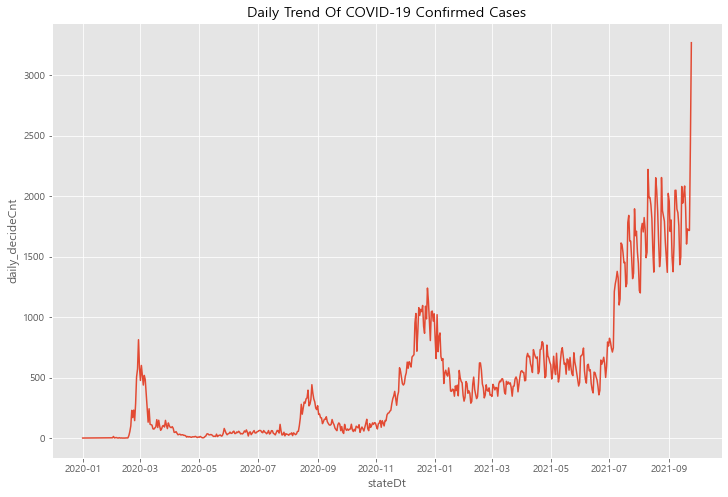

In [9]:
# 코로나 일별 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

위 세가지 그래프의 일별/년도별 확진자 확인 결과, 2020년 3월, 2020년 8월, 2020년 12월, 2021년 8월 총 4차례의 대유행이 발생 했음을 알 수 있다

In [10]:
# 대유행 기간 확진자 수 추출

covid_data_1st_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==2)|(covid_data_new.month==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==8)|(covid_data_new.month==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.year==2020) & ((covid_data_new.month==12)|(covid_data_new.month==11)))|
                ((covid_data_new.year==2021)&((covid_data_new.month==1)|(covid_data_new.month==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.year==2021) & ((covid_data_new.month==6)|(covid_data_new.month==7)|(covid_data_new.month==8)|(covid_data_new.month==9))]

<AxesSubplot:title={'center':'Trend Of The 4th Pandemic'}, xlabel='stateDt', ylabel='daily_decideCnt'>

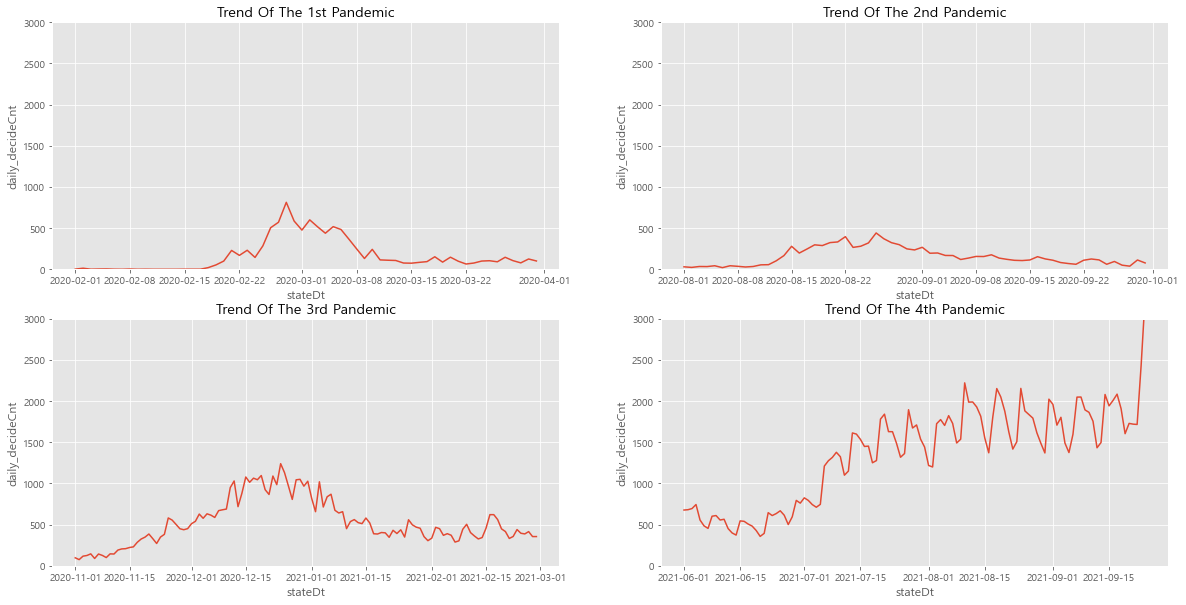

In [11]:
# 대유행 기간 확진자 수 시각화

fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

axes[0][0].set(title='Trend Of The 1st Pandemic')
axes[0][0].set_ylim([0,3000])
axes[0][1].set(title='Trend Of The 2nd Pandemic')
axes[0][1].set_ylim([0,3000])
axes[1][0].set(title='Trend Of The 3rd Pandemic')
axes[1][0].set_ylim([0,3000])
axes[1][1].set(title='Trend Of The 4th Pandemic')
axes[1][1].set_ylim([0,3000])

sns.lineplot(data=covid_data_1st_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0][0])
sns.lineplot(data=covid_data_2nd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0][1])
sns.lineplot(data=covid_data_3rd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1][0])
sns.lineplot(data=covid_data_4th_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1][1])

4차례의 대유행이 시각화로 뚜렷하게 표현되며, 4차 대유행은 여전히 진행중이다.

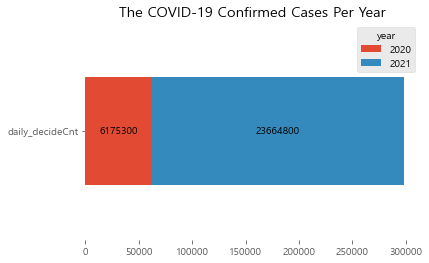

In [12]:
# 코로나 년도별 확진자 시각화

year_covid=pd.DataFrame(covid_data_new.groupby('year')['daily_decideCnt'].sum()).T

ax = year_covid.plot(kind='barh', stacked=True, title='The COVID-19 Confirmed Cases Per Year', rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.show()

# 고속도로 이용 교통량 추이

In [13]:
# 년도별/분기별 교통량 데이터 가져오기

traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [14]:
# 분기별 데이터 하나의 데이터로 합치기

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
# 명칭이 불규칙하여 통일

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

In [15]:
def day_of_week(traffic_data): #요일 추가 함수
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['year']=traffic_data.index.year 
    traffic_data['month']=traffic_data.index.month
    days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
    traffic_data['day_of_week']=traffic_data.index.dayofweek 
    traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
    return traffic_data

In [16]:
# 필요 칼럼만 추출
# 정수형 집계일자를 Datetime형 집계일자로 변환 후 인덱스로 설정
# 일별 년도/월/요일 칼럼 추가

traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data=day_of_week(traffic_data)
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


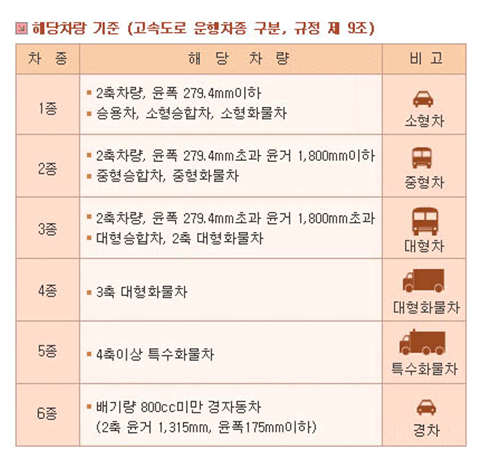

## 전국 교통량 분석

In [17]:
# 모든 곳의 톨게이트에 대한 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total=day_of_week(traffic_data_total)
# 년도별 저장

traffic_data_2018=traffic_data_total[traffic_data_total.year==2018]
traffic_data_2019=traffic_data_total[traffic_data_total.year==2019]
traffic_data_2020=traffic_data_total[traffic_data_total.year==2020]
traffic_data_2021=traffic_data_total[traffic_data_total.year==2021]

# 코로나 기간 저장

traffic_data_2020_2021=traffic_data_total[(traffic_data_total.year==2020)|(traffic_data_total.year==2021)]

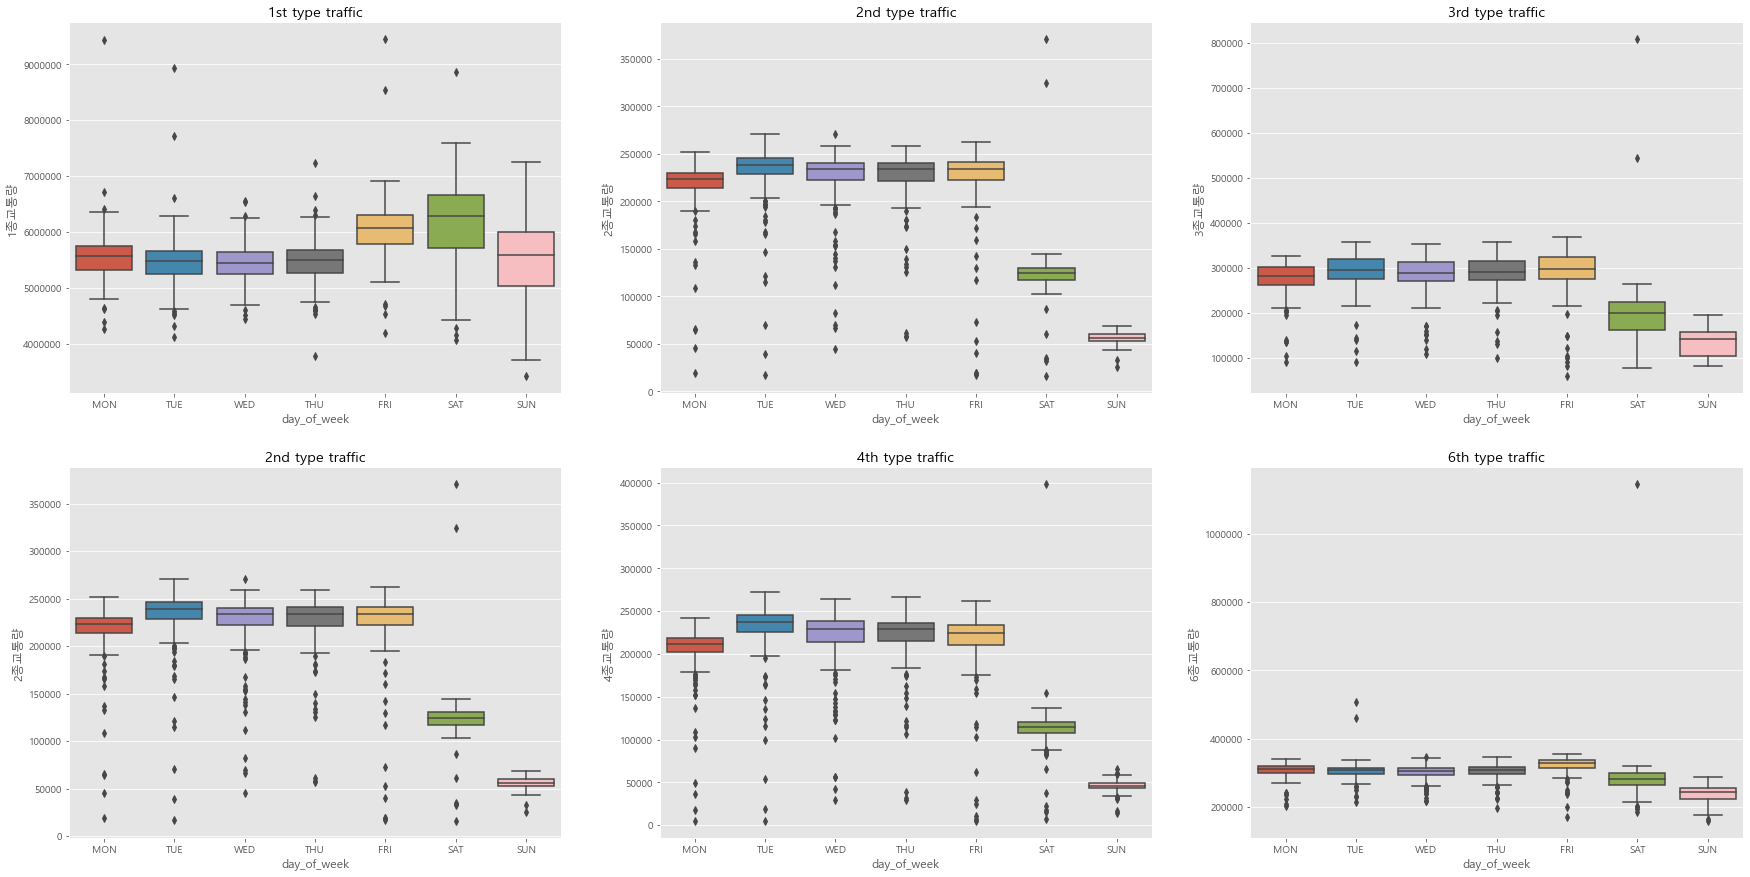

In [18]:
# 요일별 차종 평균 그래프 시각화
# lim 설정하면 안보여 ㅠ
traffic=['1종교통량','2종교통량','3종교통량','4종교통량','5종교통량','6종교통량']
traffic_e=['1st type traffic','2nd type traffic','3rd type traffic','4th type traffic','5th type traffic','6th type traffic']
fig, axes=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(30,15)
for i in range(2):
    for j in range(3):
        #axes[i][j].set_ylim([0,9000000])
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        axes[i][j].set(title=traffic_e[(i+1)*(j+1)-1])
        sns.boxplot(x='day_of_week', y=traffic[(i+1)*(j+1)-1], data=traffic_data_total,ax=axes[i][j])

요일별 교통량을 확인해본 결과, 1종 교통의 교통량은 요일과 관계없이 거의 비슷하다.
2종부터 6종까지의 교통량은 주말이 적으며, 평일이 많다.
이는 근무를 위해 움직이는 사람들의 교통량에 의해서 많다고 생각되어지며,
개인적인 일로 움직이는 교통량을 확인하기 위해서는 주말의 교통량을 확인해볼 필요가 있다고 생각된다.
또한, 1종 교통량 혹은 총 교통량보다는 나머지 교통량을 확인해보는 것이 뚜렷한 변화를 확인해볼 수 있을 것 같다.

### 전국 교통량 추이 확인 - 1종 교통량

<AxesSubplot:title={'center':'\nTrend Of First Class Traffic On Sunday (2020-2021)\n'}, xlabel='집계일자', ylabel='1종교통량'>

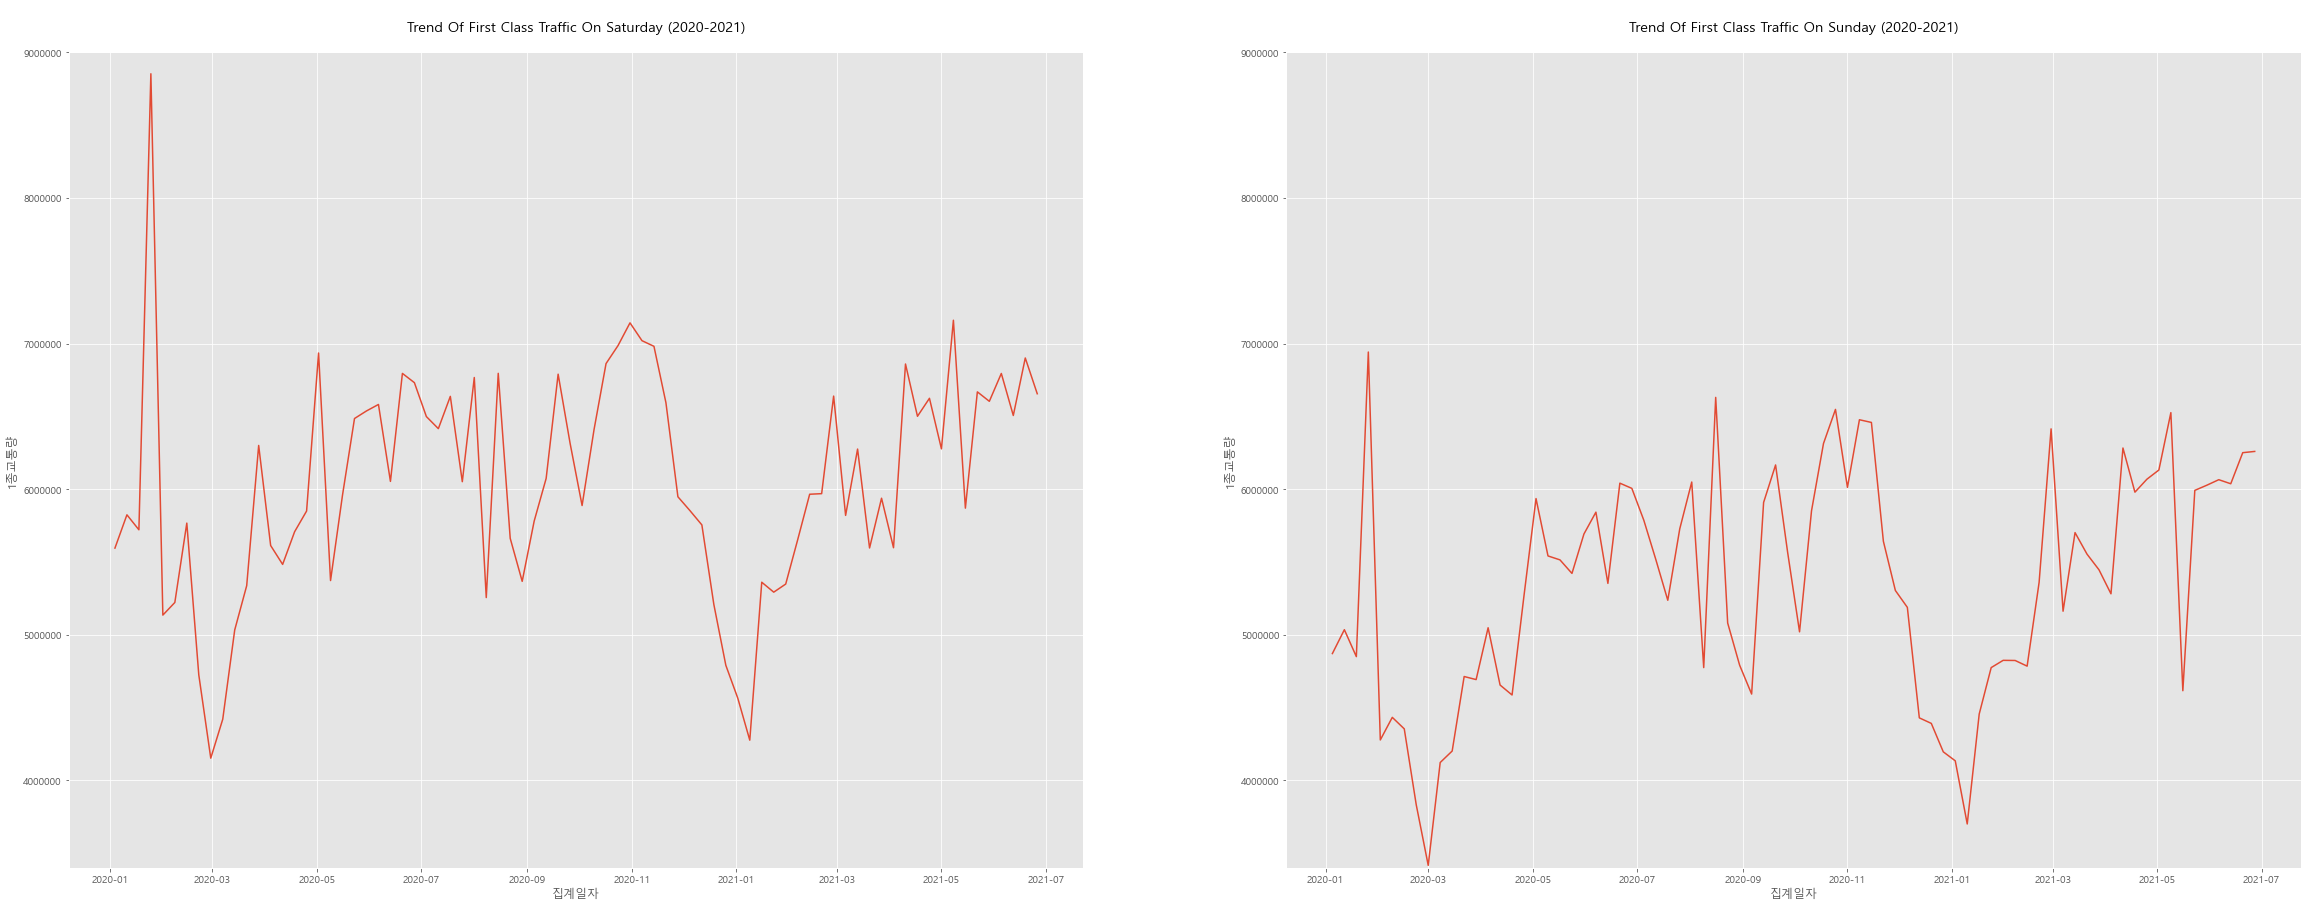

In [19]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([3400000,9000000])


axes[0].set(title='\nTrend Of First Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of First Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량', ax=axes[0],)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SUN')], x='집계일자', y='1종교통량', ax=axes[1])

### 전국 교통량 추이 확인 - 2종 교통량

<AxesSubplot:title={'center':'\nTrend Of Second Class Traffic On Sunday (2020-2021)\n'}, xlabel='집계일자', ylabel='2종교통량'>

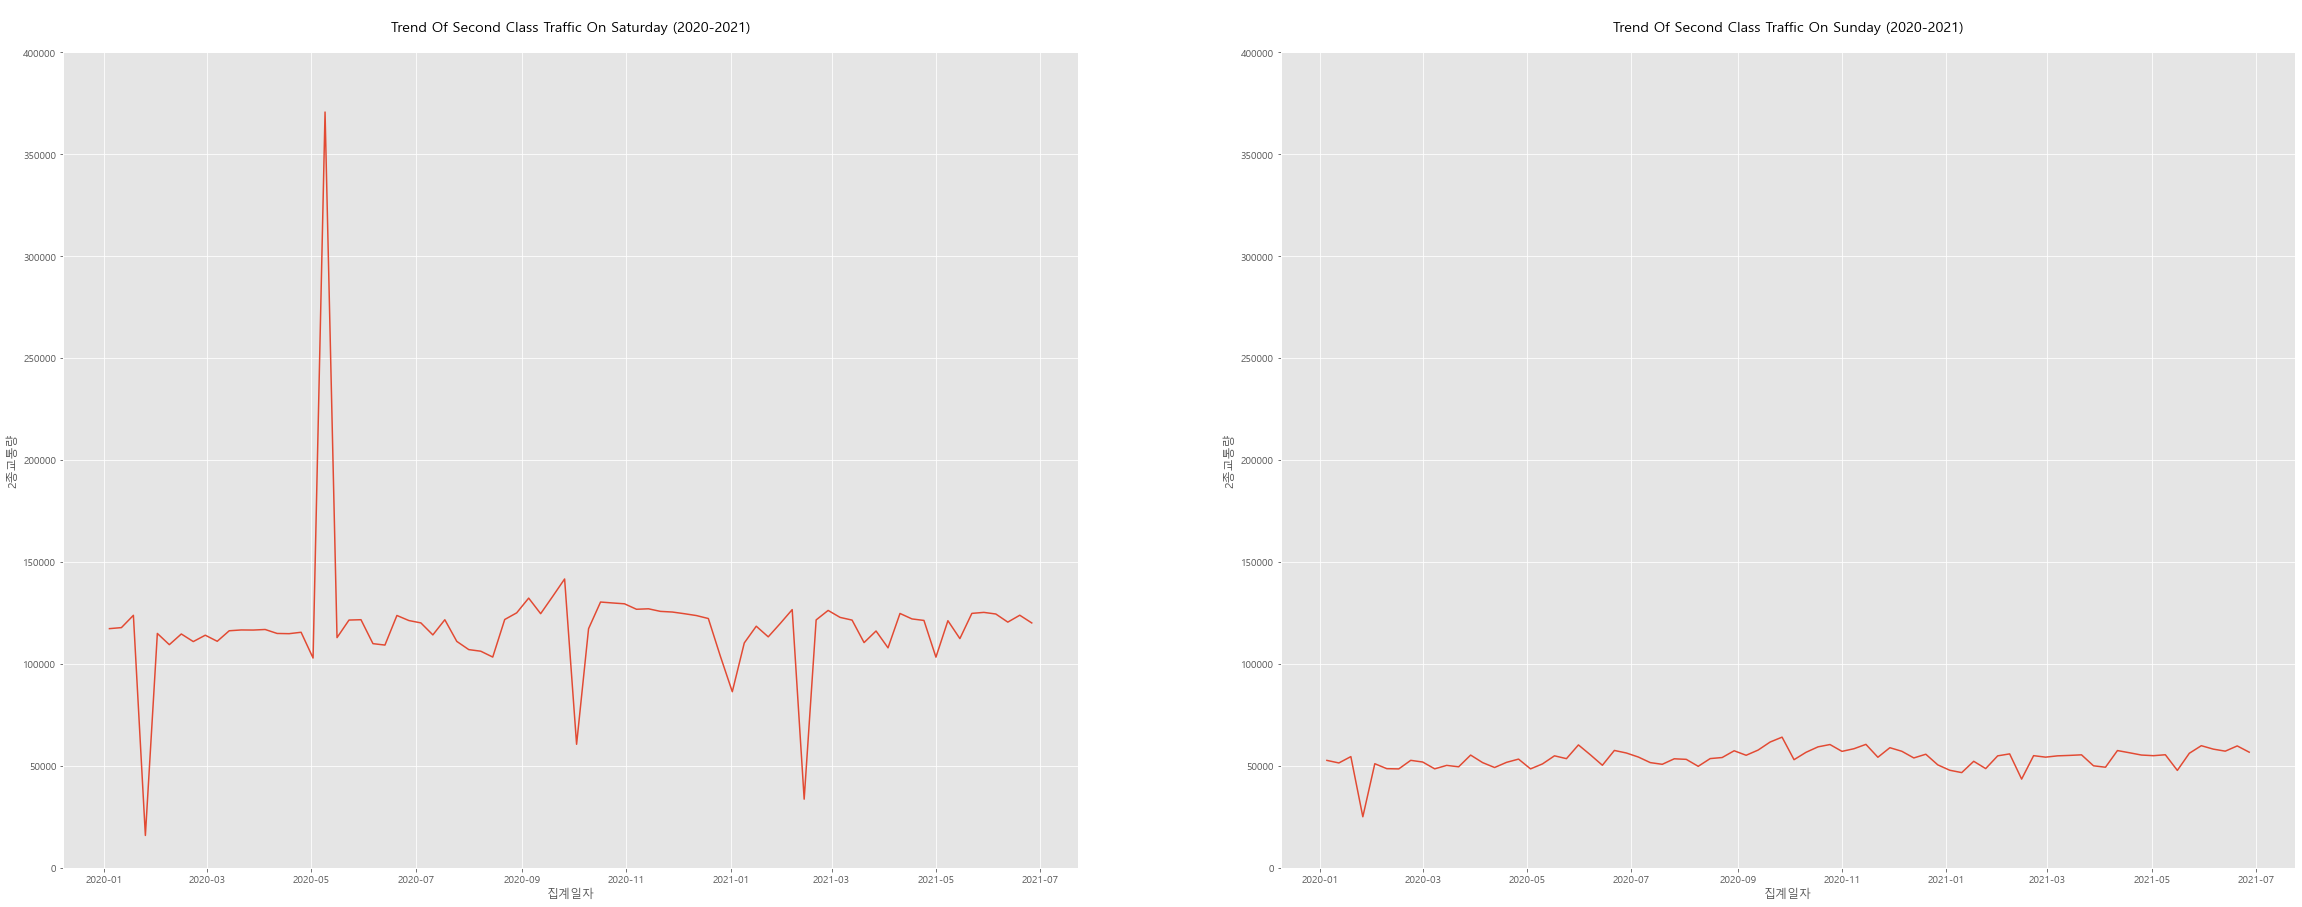

In [20]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,400000])

axes[0].set(title='\nTrend Of Second Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of Second Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='2종교통량', ax=axes[0],)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SUN')], x='집계일자', y='2종교통량', ax=axes[1])

## 서울 교통량 분석

In [21]:
seoul_traffic_data=traffic_data[(traffic_data['영업소명']=='서서울')|(traffic_data['영업소명']=='동서울')|(traffic_data['영업소명']=='서울')]
seoul_traffic_data=seoul_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
seoul_traffic_data=day_of_week(seoul_traffic_data)
#[서울]1종교통량, 2종교통량 최소 최대값 구하기

seoul_min_first=min(seoul_traffic_data['1종교통량'])
seoul_max_first=max(seoul_traffic_data['1종교통량'])

seoul_min_second=min(seoul_traffic_data['2종교통량'])
seoul_max_second=max(seoul_traffic_data['2종교통량'])

seoul_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,422993,5819,20619,2523,1392,18046,471392,2018,1,MON
2018-01-02,412943,17056,29178,11928,9202,22481,502788,2018,1,TUE
2018-01-03,395108,20067,32127,16606,11753,22022,497683,2018,1,WED
2018-01-04,402322,19891,32029,16087,11928,22179,504436,2018,1,THU
2018-01-05,435052,19531,33259,15420,11579,23623,538464,2018,1,FRI


### 서울 1종 교통량

<AxesSubplot:title={'center':"\nThe Seoul's First Class Traffic Trend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

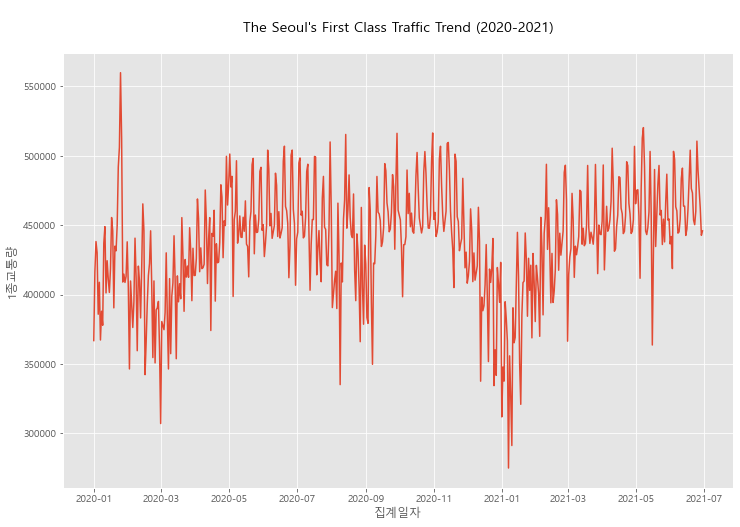

In [22]:
# 1종 교통량(대부분의 자가용) 분석 

plt.figure(figsize=(12,8)) 
plt.title('\nThe Seoul\'s First Class Traffic Trend (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

교통량이 갑자기 줄어드는 시기가 눈에 보이지만, 주중과 주말의 교통량 극심한 차이로 인하여 그래프 상에서 진동이 심하게 일어난다. 따라서 주말만 비교해 보자.

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

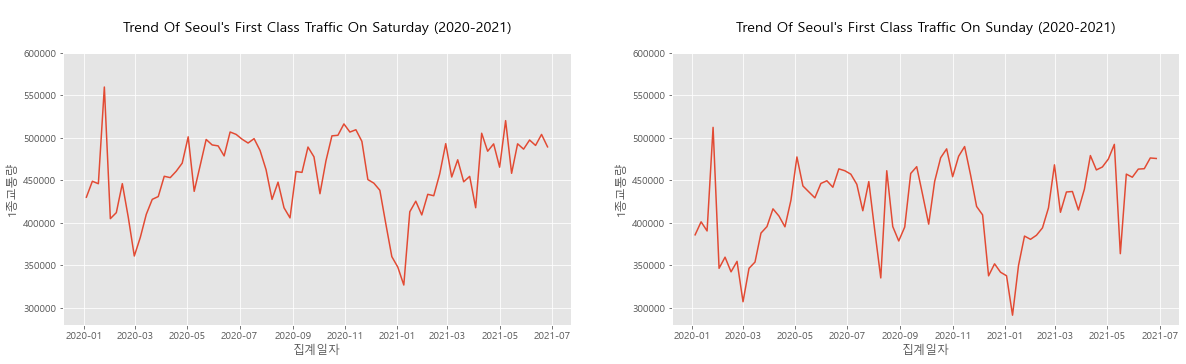

In [23]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([280000,600000])


axes[0].set(title='\nTrend Of Seoul\'s First Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SAT')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[0])
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[1])

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

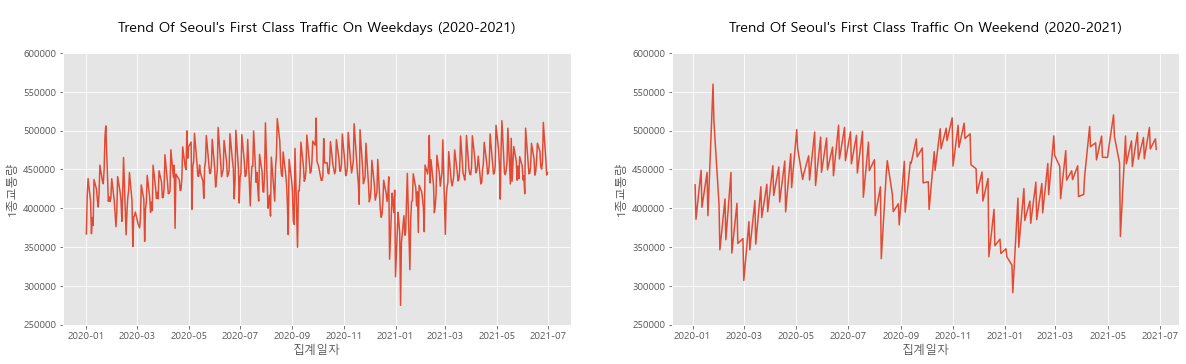

In [24]:
# 주중/ 주말 차종 평균 그래프 시각화

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([250000,600000])

axes[0].set(title='\nTrend Of Seoul\'s First Class Traffic On Weekdays (2020-2021)\n')
axes[1].set(title='\nTrend Of Seoul\'s First Class Traffic On Weekend (2020-2021)\n')

sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                    |(seoul_traffic_data.day_of_week=='TUE')
                                    |(seoul_traffic_data.day_of_week=='WED')
                                    |(seoul_traffic_data.day_of_week=='THU')
                                    |(seoul_traffic_data.day_of_week=='FRI'))
                                    &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[0])
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='SUN')|(seoul_traffic_data.day_of_week=='SAT'))&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[1])

### 서울 2종 교통량

자가용이 아닌 택배 차량을 확인해 보자.
쿠팡, CJ 택배와 같은 화물 차양은 2종 차량으로 분류 된다.

<AxesSubplot:title={'center':"\nTrend Of Seoul's Second Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

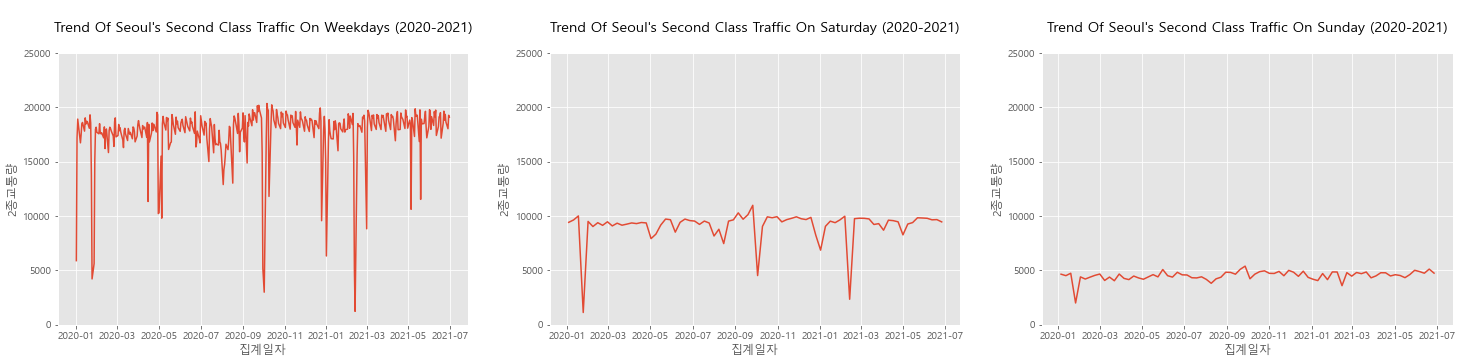

In [25]:
# 2종 교통량(중형차) 주중/ 주말 차종 평균 그래프 시각화

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\nTrend Of Seoul\'s Second Class Traffic On Weekdays (2020-2021)\n')
axes[1].set(title='\nTrend Of Seoul\'s Second Class Traffic On Saturday (2020-2021)\n')
axes[2].set(title='\nTrend Of Seoul\'s Second Class Traffic On Sunday (2020-2021)\n')
for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,25000])
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                    |(seoul_traffic_data.day_of_week=='TUE')
                                    |(seoul_traffic_data.day_of_week=='WED')
                                    |(seoul_traffic_data.day_of_week=='THU')
                                    |(seoul_traffic_data.day_of_week=='FRI'))
                                    &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[0])
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SAT')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[1])
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[2])

## 대구 교통량 분석

코로나 19 1차 대유행발발 지역인 대구를 추가적으로 살펴 보자.

In [26]:
daegu_traffic_data=traffic_data[(traffic_data['영업소명']=='서대구')|(traffic_data['영업소명']=='남대구')|(traffic_data['영업소명']=='북대구')].groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
daegu_traffic_data=day_of_week(daegu_traffic_data)
daegu_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,158432,1384,3607,712,516,5847,170498,2018,1,MON
2018-01-02,161220,6162,7056,3431,3685,7883,189437,2018,1,TUE
2018-01-03,160008,7111,8303,4490,4598,7705,192215,2018,1,WED
2018-01-04,161046,6983,8325,4443,4951,7736,193484,2018,1,THU
2018-01-05,174056,7281,8340,4325,5110,8321,207433,2018,1,FRI


### 대구 1종 교통량 분석

<AxesSubplot:title={'center':"\nTrend Of Daegu's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

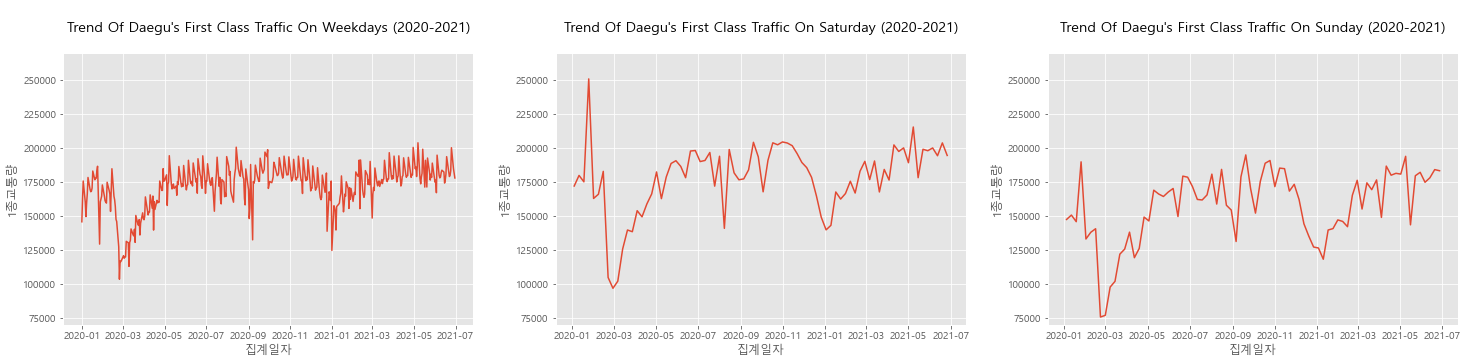

In [27]:
# 1종 교통량(소형차) 주중/ 주말 차종 평균 그래프 시각화

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\nTrend Of Daegu\'s First Class Traffic On Weekdays (2020-2021)\n')
axes[1].set(title='\nTrend Of Daegu\'s First Class Traffic On Saturday (2020-2021)\n')
axes[2].set(title='\nTrend Of Daegu\'s First Class Traffic On Sunday (2020-2021)\n')
for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([70000,270000])
sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='MON')
                                    |(daegu_traffic_data.day_of_week=='TUE')
                                    |(daegu_traffic_data.day_of_week=='WED')
                                    |(daegu_traffic_data.day_of_week=='THU')
                                    |(daegu_traffic_data.day_of_week=='FRI'))
                                    &((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[0])
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SAT')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[1])
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SUN')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량', ax=axes[2])

### 대구 2종 교통량 분석

<AxesSubplot:title={'center':"\nTrend Of Daegu's Second Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

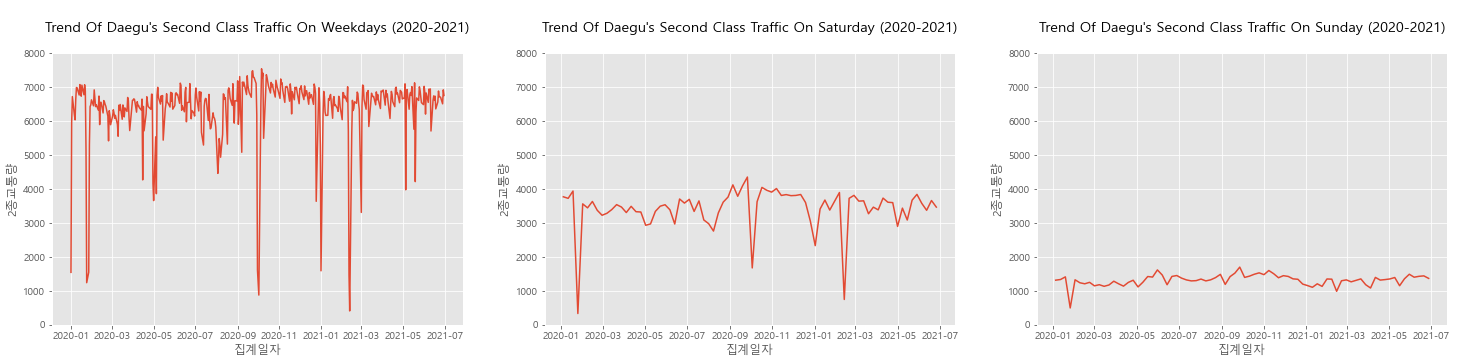

In [28]:
# 2종 교통량(중형차) 주중/ 주말 차종 평균 그래프 시각화

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\nTrend Of Daegu\'s Second Class Traffic On Weekdays (2020-2021)\n')
axes[1].set(title='\nTrend Of Daegu\'s Second Class Traffic On Saturday (2020-2021)\n')
axes[2].set(title='\nTrend Of Daegu\'s Second Class Traffic On Sunday (2020-2021)\n')
for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,8000])
sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='MON')
                                    |(daegu_traffic_data.day_of_week=='TUE')
                                    |(daegu_traffic_data.day_of_week=='WED')
                                    |(daegu_traffic_data.day_of_week=='THU')
                                    |(daegu_traffic_data.day_of_week=='FRI'))
                                    &((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[0])
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SAT')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[1])
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SUN')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='2종교통량', ax=axes[2])

# 코로나 확진자 VS 교통량

전국적으로 또는 지역별로 코로나 확진자 수와 교통량의 관계를 확인해보자

In [29]:
covid_traffic=covid_data_new.join(traffic_data_total['1종교통량'],how='inner')
covid_traffic['stateDt']=covid_traffic.index
covid_traffic.head()

,daily_decideCnt,decideCnt,deathCnt,year,month,1종교통량,stateDt
2021-06-30,761.0,156960,2018.0,2021,6,5761122,2021-06-30
2021-06-29,794.0,156166,2017.0,2021,6,5795714,2021-06-29
2021-06-28,595.0,155571,2015.0,2021,6,5983959,2021-06-28
2021-06-27,501.0,155070,2013.0,2021,6,6259574,2021-06-27
2021-06-26,614.0,154456,2012.0,2021,6,6655649,2021-06-26


<AxesSubplot:xlabel='stateDt', ylabel='1종교통량'>

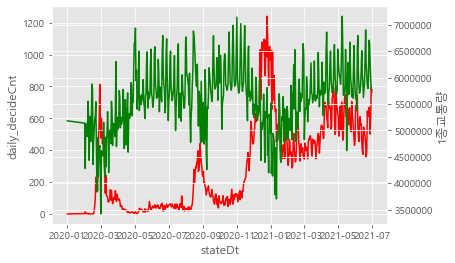

<Figure size 2160x720 with 0 Axes>

In [30]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax2.get_yaxis().get_major_formatter().set_scientific(False)
plt.figure(figsize=(30,10))

sns.lineplot(x='stateDt', y='daily_decideCnt',data=covid_traffic, ax=ax1, color='r')
sns.lineplot(x='stateDt', y='1종교통량',data=covid_traffic, ax=ax2, color='g')

## 확진자 수의 단위별 교통량 분석

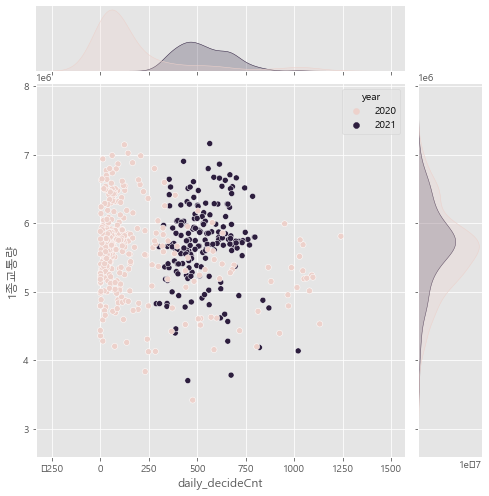

In [64]:
sns.jointplot(data=covid_traffic, x='daily_decideCnt', y='1종교통량',hue='year', height=7)

## 연휴철 교통량 및 확진자 수 분석

1월(연초행사), 2월(설), 5월(어린이날) 중심으로 분석

### 1분기(1월, 2월) 분석

In [65]:
#1분기 데이터 합치기
fitst_traffic_data=pd.concat([traffic_2020_01,traffic_2021_01])

In [66]:
#1분기데이터 년도, 월 칼럼추가
fitst_traffic_data.index=fitst_traffic_data.집계일자
fitst_traffic_data=fitst_traffic_data.drop('집계일자',axis=1)
fitst_traffic_data=fitst_traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
fitst_traffic_data=day_of_week(fitst_traffic_data)

#### 1월 중심 분석

In [67]:
# 2021 1분기중 1월로만 그룹화
jan_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2021)&(fitst_traffic_data['month']==1)]
jan_traffic_data=jan_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(5.691220e+06)
jan_traffic_data=day_of_week(jan_traffic_data)
#2021 1월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/1020
jan_covid_data_new=covid_data[['stateDt','daily_decideCnt']]
jan_covid_data_new.index=pd.to_datetime(jan_covid_data_new['stateDt'],format='%Y%m%d')
jan_covid_data_new=jan_covid_data_new.drop('stateDt',axis=1)
jan_covid_traffic=jan_covid_data_new.join(jan_traffic_data,how='left')
jan_covid_traffic = jan_covid_traffic.dropna(axis=0)
jan_covid_traffic['집계일자']=jan_covid_traffic.index
jan_covid_traffic.head()

,daily_decideCnt,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week,집계일자
stateDt,,,,,,,,,,,,
2021-01-31,0.299020,0.847764,0.009649,0.016889,0.009903,0.009623,0.036125,0.929953,2021.0,1.0,SUN,2021-01-31
2021-01-30,0.347059,0.939827,0.021057,0.026906,0.022306,0.034722,0.042135,1.086954,2021.0,1.0,SAT,2021-01-30
2021-01-29,0.447059,0.957940,0.038164,0.045617,0.038885,0.055170,0.051361,1.187137,2021.0,1.0,FRI,2021-01-29
2021-01-28,0.459804,0.851930,0.038533,0.046201,0.042250,0.058366,0.045590,1.082870,2021.0,1.0,THU,2021-01-28
2021-01-27,0.487255,0.945442,0.040355,0.047042,0.042991,0.058943,0.051469,1.186242,2021.0,1.0,WED,2021-01-27


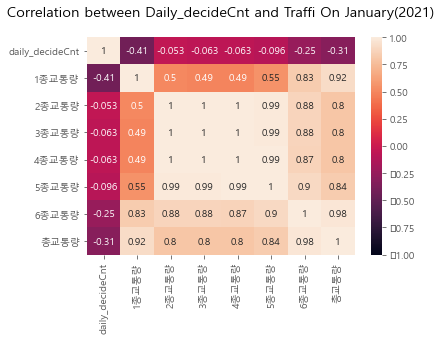

In [68]:
jan_covid_traffic_cor=jan_covid_traffic.drop(['year','month'],axis=1)
# 상관관계 수치 그래프 [Correlation Heatmap with Number]
sns.heatmap(jan_covid_traffic_cor.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation between Daily_decideCnt and Traffi On January(2021)\n')
plt.show()

1종 교통량과 일별 확진자 수의 상관계수를 확인해 보았을때 비교적 높은 상관관계를 갖는다고 볼 수 있다.
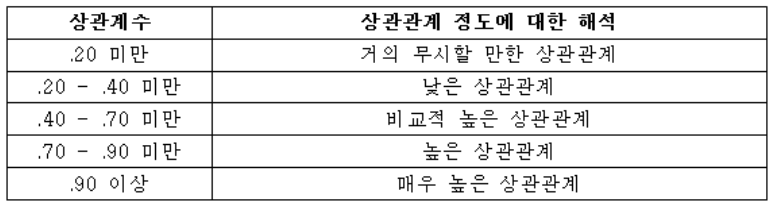



<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

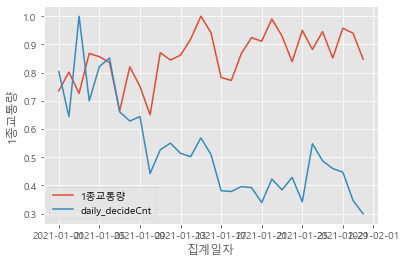

In [69]:
#2021 1종 교통량(대부분의 자가용)
#주황색이 교통량, 파란색이 코로나


sns.lineplot(data=jan_covid_traffic, x='집계일자', y='1종교통량', label='1종교통량')
sns.lineplot(data=jan_covid_traffic, x='stateDt', y='daily_decideCnt', label='daily_decideCnt')

#### 2월 중심 분석

In [70]:
# 2020 1분기중 2월로만 그룹화

feb_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2020)&(fitst_traffic_data['month']==2)]
feb_traffic_data=feb_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(5.877788e+06)


# 2021 1분기중 2월로만 그룹화

lastfeb_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2021)&(fitst_traffic_data['month']==2)]
lastfeb_traffic_data=lastfeb_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(6.639591e+06)


In [71]:
#2020 2월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/813
feb_covid_data_new=covid_data[['stateDt','daily_decideCnt']]
feb_covid_data_new.index=pd.to_datetime(feb_covid_data_new['stateDt'],format='%Y%m%d')


#2021 2월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/621
lastfeb_covid_data_n=covid_data[['stateDt','daily_decideCnt']]
lastfeb_covid_data_n.index=pd.to_datetime(lastfeb_covid_data_n['stateDt'],format='%Y%m%d')


In [72]:
feb_2020_covid_traffic=feb_traffic_data.join(feb_covid_data_new['daily_decideCnt'], how='inner')
feb_2021_covid_traffic=lastfeb_traffic_data.join(lastfeb_covid_data_n['daily_decideCnt'], how='inner')

In [73]:
feb_2020_covid_traffic.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,daily_decideCnt
2020-02-01,0.873712,0.019559,0.031881,0.017592,0.027420,0.042296,1.012459,0.00246
2020-02-02,0.727833,0.008686,0.023428,0.007392,0.007229,0.034225,0.808793,0.01599
2020-02-03,0.872021,0.036686,0.047829,0.035328,0.050891,0.050681,1.093436,0.00123
2020-02-04,0.851268,0.038354,0.049710,0.039311,0.054722,0.049431,1.082795,0.00369
2020-02-05,0.830574,0.036885,0.048324,0.036217,0.052024,0.048338,1.052362,0.00492


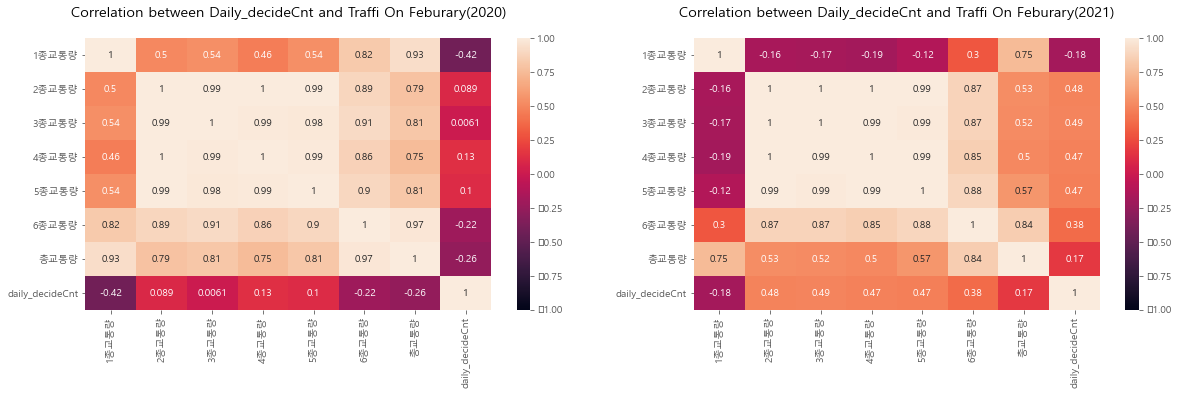

In [74]:
fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)
axes[0].set(title='Correlation between Daily_decideCnt and Traffi On Feburary(2020)\n')
axes[1].set(title='Correlation between Daily_decideCnt and Traffi On Feburary(2021)\n')

sns.heatmap(feb_2020_covid_traffic.corr(), vmin=-1, vmax=1, annot=True,ax=axes[0])

sns.heatmap(feb_2021_covid_traffic.corr(), vmin=-1, vmax=1, annot=True,ax=axes[1])

plt.show()